# Fecha de entrega: 23/07/2022 (corresponde a clase 15)

# Base de datos 1: Bizin, Luciano; Suarez, Javier.

# Diccionario

- **Date**: fecha en YYYY-MM-DD (datetime64 [ns])
- **Price**: precio de cierre de BTC en el día de la fecha (USD) (float) 
- **Open**: precio de apertura de BTC en el día de la fecha (USD) (float) 
- **High**: precio más alto de BTC en el día de la fecha (USD) (float) 
- **Low**: precio más bajo de BTC en el día de la fecha (USD) (float) 
- **Vol.**: volumen de BTC transferidos (comprados+vendidos) en el día de la fecha (BTC) (float) 
- **Porcentage_diff**: diferencial porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float)  
- **Target**: 1 indica que en el día de la fecha el precio subió, y 0 que el precio bajó (float) (se puede convertir en int).

# Se cargan las librerías

In [80]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Data acquisition

In [2]:
BTC_raw = pd.read_csv ("D:\Luciano\Programación\Data science\Clase 15 (16-07-2022)\Desafío (base de datos)\Bitcoin Historical Data (investing).csv", sep=",", thousands=",", decimal=".")

In [3]:
BTC_raw.head()

Date    Price     Open     High      Low     Vol. Change %
0  Jul 20, 2022  23149.1  23412.0  23429.9  22965.9  290.21K   -1.12%
1  Jul 19, 2022  23410.2  22529.3  23757.3  21581.8  308.91K    3.93%
2  Jul 18, 2022  22525.8  20785.6  22714.9  20770.6  279.72K    8.37%
3  Jul 17, 2022  20785.6  21209.8  21654.4  20755.2  132.81K   -2.00%
4  Jul 16, 2022  21209.9  20825.2  21561.3  20484.4  136.89K    1.85%

# Data wrangling

## Etapa de descubrimiento

### Se procede a analizar la estructura fundamental de la data en bruto (BTC_raw)
* Se ejecuta info() => de 4386 entradas [0:4386] no se reconocen NaN values en ninguna de las columnas (de todas formas cada columna va a ser tratada más adelante para revisar que no haya algún str en Date, Vol. or Change, que presente algún tipo de valores perdidos en esas columnas). 
* Se ejecuta columns para conocer los features o columnas del dataframe.
* Se implementa otra forma de conocer nulos (igual comentario que arriba, se buscará conocer valores perdidos en mismas columnas). 
* Se aplicó la función duplicated para conocer registro idénticos.

In [4]:
BTC_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4386 non-null   object 
 1   Price     4386 non-null   float64
 2   Open      4386 non-null   float64
 3   High      4386 non-null   float64
 4   Low       4386 non-null   float64
 5   Vol.      4386 non-null   object 
 6   Change %  4386 non-null   object 
dtypes: float64(4), object(3)
memory usage: 240.0+ KB


In [5]:
BTC_raw.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [6]:
BTC_raw.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

### Se buscan conocer duplicados

#### Duplicados en general

In [7]:
BTC_raw.duplicated().sum()

0

#### Duplicados en particular
* Se busca conocer los duplicados en la columna [Date] ya que es crítica para una serie de tiempos.

**Conclusión 1**: no se encontraron registros repetidos en la columna [Date].

**Conclusión 2**: se encontraron la cantidad exacta de días esperados por cada año desde el 2011-2022. 

In [8]:
BTC_raw ["Date"].duplicated().sum()

0

#### Se buscan conocer valores perdidos o missing values

##### Se estudian las columnas [Date], [Vol.] y [Change] 
* El resto de las columnas quedan descartadas por su tipo float y la información provista por info().

###### Missing values en columna [Date]

* Se busca conocer que la cantidad de registros por año sean los correctos (2012, 2016 y 2022 fueron bisiestos).

**Conclusión 1**: la sucesión de fechas es correcta (sin repeticiones ni missing values).

In [9]:
Years = ["2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]

for year in Years:
    print ("Year"+year+": ", BTC_raw ["Date"].str.contains(year).sum())

Year2011:  365
Year2012:  366
Year2013:  365
Year2014:  365
Year2015:  365
Year2016:  366
Year2017:  365
Year2018:  365
Year2019:  365
Year2020:  366
Year2021:  365
Year2022:  201


##### Missing values en columna [Vol.]

* Se busca conocer la letra asociada a cada registro para conocer sus tipos.
* Se contará la cantidad de registros con diverso tipo de letra final asociada.
* Luego se procederá a restar del total de registros cada uno de los conteos realizados en el paso anterior. En caso de que el resultado sea 0, significa que todos los registros están completos. En caso contrario, se procederá a evaluar la situación.

**Conclusión 1**: el valor de la resta no fue 0.

In [10]:
diverse_letters_volume = [] 
for n in BTC_raw ["Vol."]:
    
    diverse_letters_volume.append (n [-1])
    
BTC_vol_letter = pd.DataFrame (diverse_letters_volume)

In [11]:
BTC_vol_letter.value_counts()

K    4115
M     249
B      16
-       6
dtype: int64

In [12]:
BTC_raw ["Vol."].loc [BTC_raw ["Vol."] == "-"]

4043    -
4044    -
4045    -
4046    -
4047    -
4048    -
Name: Vol., dtype: object

In [13]:
BTC_raw [4043:4049]

Date  Price  Open  High   Low Vol. Change %
4043  Jun 25, 2011   17.5  17.5  17.5  17.5    -    0.00%
4044  Jun 24, 2011   17.5  17.5  17.5  17.5    -    0.00%
4045  Jun 23, 2011   17.5  17.5  17.5  17.5    -    0.00%
4046  Jun 22, 2011   17.5  17.5  17.5  17.5    -    0.00%
4047  Jun 21, 2011   17.5  17.5  17.5  17.5    -    0.00%
4048  Jun 20, 2011   17.5  17.5  17.5  17.5    -    0.00%

In [14]:
BTC_raw ["Price"].loc [BTC_raw ["Price"] == 17.5]

3465    17.5
4043    17.5
4044    17.5
4045    17.5
4046    17.5
4047    17.5
4048    17.5
4049    17.5
Name: Price, dtype: float64

In [15]:
BTC_raw ["Vol."] [4036:4056]

4036     19.45K
4037     33.28K
4038     34.96K
4039     21.04K
4040     24.40K
4041     31.45K
4042     15.05K
4043          -
4044          -
4045          -
4046          -
4047          -
4048          -
4049     30.18K
4050     35.54K
4051    108.62K
4052     49.20K
4053     27.71K
4054     36.16K
4055     73.42K
Name: Vol., dtype: object

In [16]:
Serie1 = BTC_raw ["Vol."] [4041:4043]
Serie1 = Serie1.str.replace("K","")

In [17]:
Serie2 = BTC_raw ["Vol."] [4049:4051]
Serie2 = Serie2.str.replace("K","")

In [18]:
S1 = Serie1.astype(float).mean()
S1

23.25

In [19]:
S2 = Serie2.astype(float).mean()
S2

32.86

In [20]:
Promedio = (S1+S2)/2
str(Promedio)

'28.055'

In [21]:
BTC_raw_2 = BTC_raw 

In [23]:
BTC_raw_2 ["Vol."] [4043:4049] = BTC_raw_2 ["Vol."] [4043:4049].str.replace ("-", "28.055K")

C:\Users\lucia\AppData\Local\Temp/ipykernel_6616/126867351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_raw_2 ["Vol."] [4043:4049] = BTC_raw_2 ["Vol."] [4043:4049].str.replace ("-", "28.055K")


In [24]:
BTC_raw_2 [4041:4051]

Date  Price  Open  High   Low     Vol. Change %
4041  Jun 27, 2011   16.8  16.5  18.0  15.0   31.45K    1.82%
4042  Jun 26, 2011   16.5  17.5  17.5  14.0   15.05K   -6.05%
4043  Jun 25, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4044  Jun 24, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4045  Jun 23, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4046  Jun 22, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4047  Jun 21, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4048  Jun 20, 2011   17.5  17.5  17.5  17.5  28.055K    0.00%
4049  Jun 19, 2011   17.5  16.9  18.9  16.9   30.18K    3.67%
4050  Jun 18, 2011   16.9  15.7  17.0  15.1   35.54K    7.72%

## Estructurando los datos

In [27]:
BTC_raw_3 = BTC_raw_2 

In [29]:
BTC_raw_3.head()

Date    Price     Open     High      Low     Vol. Change %
0  Jul 20, 2022  23149.1  23412.0  23429.9  22965.9  290.21K   -1.12%
1  Jul 19, 2022  23410.2  22529.3  23757.3  21581.8  308.91K    3.93%
2  Jul 18, 2022  22525.8  20785.6  22714.9  20770.6  279.72K    8.37%
3  Jul 17, 2022  20785.6  21209.8  21654.4  20755.2  132.81K   -2.00%
4  Jul 16, 2022  21209.9  20825.2  21561.3  20484.4  136.89K    1.85%

### Volumen (etapa 1 = quitar las letras finales y ajustar los números según su valor [se dejan en str])

In [30]:
BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("K")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("K")].str.replace("K","").astype(float)*1000).astype(str)

C:\Users\lucia\AppData\Local\Temp/ipykernel_6616/3639086038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("K")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("K")].str.replace("K","").astype(float)*1000).astype(str)


In [31]:
BTC_raw_3 ["Vol."]

0                 290210.0
1                 308910.0
2                 279720.0
3                 132810.0
4                 136890.0
5                 164670.0
6                 205280.0
7                 249380.0
8                 167910.0
9                 160200.0
10                204680.0
11                190110.0
12                439900.0
13                115810.0
14                105240.0
15                122430.0
16                 92790.0
17       65269.99999999999
18                 58570.0
19                150180.0
20                127730.0
21                 98970.0
22                 83830.0
23                 84690.0
24                 67210.0
25                 66630.0
26                104560.0
27                110700.0
28                125940.0
29                136320.0
30                140600.0
31                169390.0
32                267250.0
33                136270.0
34                144000.0
35                280410.0
36                251010.0
3

In [32]:
BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("M")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("M")].str.replace("M","").astype(float)*1000000).astype(str)

C:\Users\lucia\AppData\Local\Temp/ipykernel_6616/3705158417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("M")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("M")].str.replace("M","").astype(float)*1000000).astype(str)


In [33]:
BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("B")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("B")].str.replace("B","").astype(float)*1000000000).astype(str)

C:\Users\lucia\AppData\Local\Temp/ipykernel_6616/4091374104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("B")] = (BTC_raw_3 ["Vol."].loc[BTC_raw_3 ["Vol."].str.contains("B")].str.replace("B","").astype(float)*1000000000).astype(str)


In [34]:
BTC_raw_3

Date    Price     Open     High      Low                Vol.  \
0     Jul 20, 2022  23149.1  23412.0  23429.9  22965.9            290210.0   
1     Jul 19, 2022  23410.2  22529.3  23757.3  21581.8            308910.0   
2     Jul 18, 2022  22525.8  20785.6  22714.9  20770.6            279720.0   
3     Jul 17, 2022  20785.6  21209.8  21654.4  20755.2            132810.0   
4     Jul 16, 2022  21209.9  20825.2  21561.3  20484.4            136890.0   
5     Jul 15, 2022  20825.1  20586.1  21178.1  20393.4            164670.0   
6     Jul 14, 2022  20586.0  20250.0  20862.2  19664.9            205280.0   
7     Jul 13, 2022  20250.0  19331.6  20250.8  18942.2            249380.0   
8     Jul 12, 2022  19330.9  19963.2  20051.7  19279.6            167910.0   
9     Jul 11, 2022  19963.2  20847.2  20855.0  19897.0            160200.0   
10    Jul 10, 2022  20847.4  21587.4  21599.2  20689.7            204680.0   
11    Jul 09, 2022  21587.5  21610.4  21944.1  21338.4            190110.0   
12    Jul 08, 2022  21611.2  21637.1  22482.1  21207.0            439900.0   
13    Jul 07, 2022  21637.8  20557.9  21817.8  20282.7            115810.0   
14    Jul 06, 2022  20561.1  20180.4  20654.9  19785.3            105240.0   
15    Jul 05, 2022  20200.6  20215.8  20706.9  19315.4            122430.0   
16    Jul 04, 2022  20215.8  19310.6  20303.8  19052.5             92790.0   
17    Jul 03, 2022  19309.9  19243.4  19626.4  18794.4   65269.99999999999   
18    Jul 02, 2022  19243.2  19275.4  19425.4  19006.4             58570.0   
19    Jul 01, 2022  19262.9  19926.6  20785.6  18980.1            150180.0   
20    Jun 30, 2022  19926.6  20111.3  20155.1  18682.7            127730.0   
21    Jun 29, 2022  20111.3  20278.0  20415.8  19880.7             98970.0   
22    Jun 28, 2022  20278.0  20727.9  21200.2  20210.5             83830.0   
23    Jun 27, 2022  20730.2  21037.7  21497.5  20568.0             84690.0   
24    Jun 26, 2022  21043.5  21489.9  21837.4  20989.7             67210.0   
25    Jun 25, 2022  21489.9  21226.9  21553.4  20917.5             66630.0   
26    Jun 24, 2022  21226.9  21100.9  21488.7  20743.9            104560.0   
27    Jun 23, 2022  21100.7  19967.3  21189.8  19907.5            110700.0   
28    Jun 22, 2022  19965.8  20720.2  20864.3  19780.2            125940.0   
29    Jun 21, 2022  20720.4  20571.6  21689.3  20371.7            136320.0   
30    Jun 20, 2022  20572.3  20576.9  20996.8  19658.8            140600.0   
31    Jun 19, 2022  20577.2  18983.4  20763.5  17983.7            169390.0   
32    Jun 18, 2022  18986.5  20446.4  20744.7  17630.5            267250.0   
33    Jun 17, 2022  20444.6  20391.3  21315.4  20244.1            136270.0   
34    Jun 16, 2022  20386.6  22577.9  22942.1  20231.1            144000.0   
35    Jun 15, 2022  22577.9  22137.5  22754.4  20125.8            280410.0   
36    Jun 14, 2022  22157.3  22449.1  23200.3  20860.9            251010.0   
37    Jun 13, 2022  22448.0  26606.3  26857.6  22006.3            379260.0   
38    Jun 12, 2022  26606.3  28404.0  28534.8  26606.3            120020.0   
39    Jun 11, 2022  28403.4  29083.3  29426.6  28161.8             82920.0   
40    Jun 10, 2022  29083.3  30097.4  30325.6  28884.9            104260.0   
41    Jun 09, 2022  30097.8  30202.1  30691.4  29953.8             61720.0   
42    Jun 08, 2022  30201.6  31127.2  31312.1  29874.8             87960.0   
43    Jun 07, 2022  31128.8  31370.3  31556.6  29235.0            140320.0   
44    Jun 06, 2022  31367.6  29911.2  31753.4  29888.6             94010.0   
45    Jun 05, 2022  29913.0  29865.1  30166.9  29539.0             30330.0   
46    Jun 04, 2022  29864.3  29700.9  29963.8  29489.5             33510.0   
47    Jun 03, 2022  29700.9  30455.7  30674.8  29330.8             72130.0   
48    Jun 02, 2022  30455.5  29798.6  30638.5  29604.4             81400.0   
49    Jun 01, 2022  29798.5  31793.1  31969.9  29396.6            135090.0   
50    May 31, 2022  31793.4  31730.2

### Porcentaje (etapa 1 = quitar "%")

In [35]:
BTC_raw_4 = BTC_raw_3

In [36]:
BTC_raw_4 ["Change %"] = BTC_raw_4 ["Change %"].str.replace ("%","")

In [66]:
BTC_raw_4.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

### Fecha

In [44]:
BTC_raw_5 = BTC_raw_4

In [38]:
BTC_raw_5 ['Date'] = pd.to_datetime(BTC_raw_5 ['Date'])

In [39]:
BTC_raw_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4386 non-null   datetime64[ns]
 1   Price     4386 non-null   float64       
 2   Open      4386 non-null   float64       
 3   High      4386 non-null   float64       
 4   Low       4386 non-null   float64       
 5   Vol.      4386 non-null   object        
 6   Change %  4386 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 240.0+ KB


### Volumen (etapa 2 = convertir a float)

In [40]:
BTC_raw_5 ['Vol.'] = BTC_raw_5 ['Vol.'].astype(float)

### Porcentaje (etapa 2 = convertir a float)

In [41]:
BTC_raw_5 ['Change %'] = BTC_raw_5 ['Change %'].astype(float)

In [43]:
BTC_raw_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4386 non-null   datetime64[ns]
 1   Price     4386 non-null   float64       
 2   Open      4386 non-null   float64       
 3   High      4386 non-null   float64       
 4   Low       4386 non-null   float64       
 5   Vol.      4386 non-null   float64       
 6   Change %  4386 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 240.0 KB


In [59]:
BTC_raw_6 = BTC_raw_5.sort_values("Date")
BTC_raw_6

Date    Price     Open     High      Low          Vol.  Change %
4385 2010-07-18      0.1      0.0      0.1      0.1  8.000000e+01      0.00
4384 2010-07-19      0.1      0.1      0.1      0.1  5.700000e+02      0.00
4383 2010-07-20      0.1      0.1      0.1      0.1  2.600000e+02      0.00
4382 2010-07-21      0.1      0.1      0.1      0.1  5.800000e+02      0.00
4381 2010-07-22      0.1      0.1      0.1      0.1  2.160000e+03      0.00
4380 2010-07-23      0.1      0.1      0.1      0.1  2.400000e+03      0.00
4379 2010-07-24      0.1      0.1      0.1      0.1  5.000000e+02      0.00
4378 2010-07-25      0.1      0.1      0.1      0.1  1.550000e+03      0.00
4377 2010-07-26      0.1      0.1      0.1      0.1  8.800000e+02      0.00
4376 2010-07-27      0.1      0.1      0.1      0.1  3.370000e+03      0.00
4375 2010-07-28      0.1      0.1      0.1      0.1  4.390000e+03      0.00
4374 2010-07-29      0.1      0.1      0.1      0.1  8.060000e+03      0.00
4373 2010-07-30      0.1      0.1      0.1      0.1  3.020000e+03      0.00
4372 2010-07-31      0.1      0.1      0.1      0.1  4.020000e+03      0.00
4371 2010-08-01      0.1      0.1      0.1      0.1  2.600000e+03      0.00
4370 2010-08-02      0.1      0.1      0.1      0.1  3.600000e+03      0.00
4369 2010-08-03      0.1      0.1      0.1      0.1  9.820000e+03      0.00
4368 2010-08-04      0.1      0.1      0.1      0.1  3.490000e+03      0.00
4367 2010-08-05      0.1      0.1      0.1      0.1  5.030000e+03      0.00
4366 2010-08-06      0.1      0.1      0.1      0.1  1.400000e+03      0.00
4365 2010-08-07      0.1      0.1      0.1      0.1  2.620000e+03      0.00
4364 2010-08-08      0.1      0.1      0.1      0.1  2.200000e+03      0.00
4363 2010-08-09      0.1      0.1      0.1      0.1  1.363000e+04      0.00
4362 2010-08-10      0.1      0.1      0.1      0.1  1.310000e+03      0.00
4361 2010-08-11      0.1      0.1      0.1      0.1  1.406000e+04      0.00
4360 2010-08-12      0.1      0.1      0.1      0.1  2.060000e+03      0.00
4359 2010-08-13      0.1      0.1      0.1      0.1  3.590000e+03      0.00
4358 2010-08-14      0.1      0.1      0.1      0.1  4.400000e+03      0.00
4357 2010-08-15      0.1      0.1      0.1      0.1  4.460000e+03      0.00
4356 2010-08-16      0.1      0.1      0.1      0.1  1.073000e+04      0.00
4355 2010-08-17      0.1      0.1      0.1      0.1  1.319000e+04      0.00
4354 2010-08-18      0.1      0.1      0.1      0.1  2.950000e+03      0.00
4353 2010-08-19      0.1      0.1      0.1      0.1  7.400000e+02      0.00
4352 2010-08-20      0.1      0.1      0.1      0.1  4.200000e+03      0.00
4351 2010-08-21      0.1      0.1      0.1      0.1  1.044000e+04      0.00
4350 2010-08-22      0.1      0.1      0.1      0.1  1.865000e+04      0.00
4349 2010-08-23      0.1      0.1      0.1      0.1  4.300000e+03      0.00
4348 2010-08-24      0.1      0.1      0.1      0.1  6.710000e+03      0.00
4347 2010-08-25      0.1      0.1      0.1      0.1  4.230000e+03      0.00
4346 2010-08-26      0.1      0.1      0.1      0.1  3.870000e+03      0.00
4345 2010-08-27      0.1      0.1      0.1      0.1  9.010000e+03      0.00
4344 2010-08-28      0.1      0.1      0.1      0.1  6.170000e+03      0.00
4343 2010-08-29      0.1      0.1      0.1      0.1  3.170000e+03      0.00
4342 2010-08-30      0.1      0.1      0.1      0.0  3.419000e+04      0.00
4341 2010-08-31      0.1      0.1      0.1      0.1  1.489000e+04      0.00
4340 2010-09-01      0.1      0.1      0.1      0.1  7.170000e+03      0.00
4339 2010-09-02      0.1      0.1      0.1      0.1  8.150000e+03      0.00
4338 2010-09-03      0.1      0.1      0.1      0.1  8.900000e+02      0.00
4337 2010-09-04      0.1      0.1      0.1      0.1  3.300000e+03      0.00
4336 2010-09-05      0.1      0.1      0.1      0.1  8.460000e+03      0.00
4335 2010-09-06      0.1      0.1      0.1      0.1  9.100000e+02      0.00
4334 2010-09-07      0.1      0.1      0.1      0.1  3.4600

In [60]:
BTC_raw_7 = BTC_raw_6.reset_index()

In [66]:
BTC_raw_8 = BTC_raw_7.drop (["index"], axis=1)

In [67]:
BTC_raw_8.head()

Date  Price  Open  High  Low    Vol.  Change %
0 2010-07-18    0.1   0.0   0.1  0.1    80.0       0.0
1 2010-07-19    0.1   0.1   0.1  0.1   570.0       0.0
2 2010-07-20    0.1   0.1   0.1  0.1   260.0       0.0
3 2010-07-21    0.1   0.1   0.1  0.1   580.0       0.0
4 2010-07-22    0.1   0.1   0.1  0.1  2160.0       0.0

## Estudio descriptivo

**Conclusión 1**: Al momento de estudiar la base de datos se deberá normalizar debido a la diferencia sustancial entre los distintos valores.

In [75]:
BTC_raw_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4386 non-null   datetime64[ns]
 1   Price     4386 non-null   float64       
 2   Open      4386 non-null   float64       
 3   High      4386 non-null   float64       
 4   Low       4386 non-null   float64       
 5   Vol.      4386 non-null   float64       
 6   Change %  4386 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 240.0 KB


In [74]:
print(BTC_raw_8.shape)

(4386, 7)


In [76]:
type(BTC_raw_8)

pandas.core.frame.DataFrame

In [68]:
BTC_raw_8.describe()

Price          Open          High           Low          Vol.  \
count   4386.000000   4386.000000   4386.000000   4386.000000  4.386000e+03   
mean    8193.333105   8188.128317   8415.615823   7930.854651  1.406857e+07   
std    14597.865967  14596.771286  14991.729198  14142.766877  1.652902e+08   
min        0.100000      0.000000      0.100000      0.000000  8.000000e+01   
25%      121.250000    120.825000    124.925000    114.625000  2.987500e+04   
50%      663.950000    663.600000    685.650000    647.850000  6.705000e+04   
75%     8735.825000   8731.300000   8938.575000   8487.825000  1.721525e+05   
max    67527.900000  67528.700000  68990.600000  66334.900000  4.470000e+09   

          Change %  
count  4386.000000  
mean      0.444749  
std       7.510488  
min     -57.210000  
25%      -1.230000  
50%       0.000000  
75%       1.907500  
max     336.840000

In [77]:
BTC_raw_8.describe().round()

Price     Open     High      Low          Vol.  Change %
count   4386.0   4386.0   4386.0   4386.0  4.386000e+03    4386.0
mean    8193.0   8188.0   8416.0   7931.0  1.406857e+07       0.0
std    14598.0  14597.0  14992.0  14143.0  1.652902e+08       8.0
min        0.0      0.0      0.0      0.0  8.000000e+01     -57.0
25%      121.0    121.0    125.0    115.0  2.987500e+04      -1.0
50%      664.0    664.0    686.0    648.0  6.705000e+04       0.0
75%     8736.0   8731.0   8939.0   8488.0  1.721520e+05       2.0
max    67528.0  67529.0  68991.0  66335.0  4.470000e+09     337.0

<AxesSubplot:xlabel='Date', ylabel='Price'>

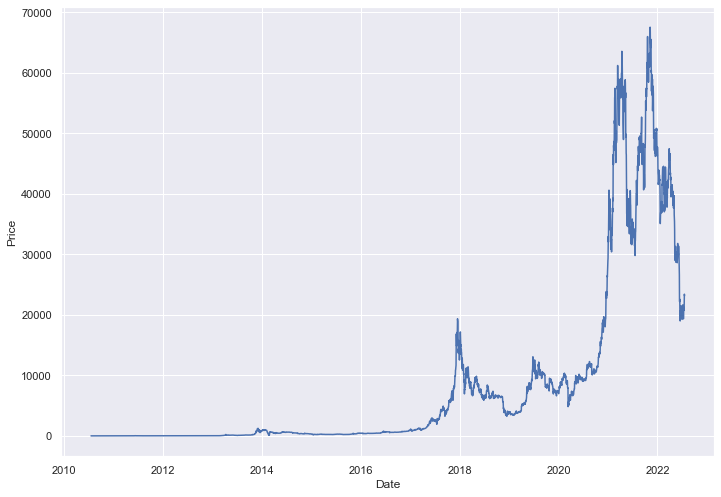

In [151]:
sns.lineplot(data=BTC_raw_8, x="Date", y="Price")

In [78]:
BTC_raw_8.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

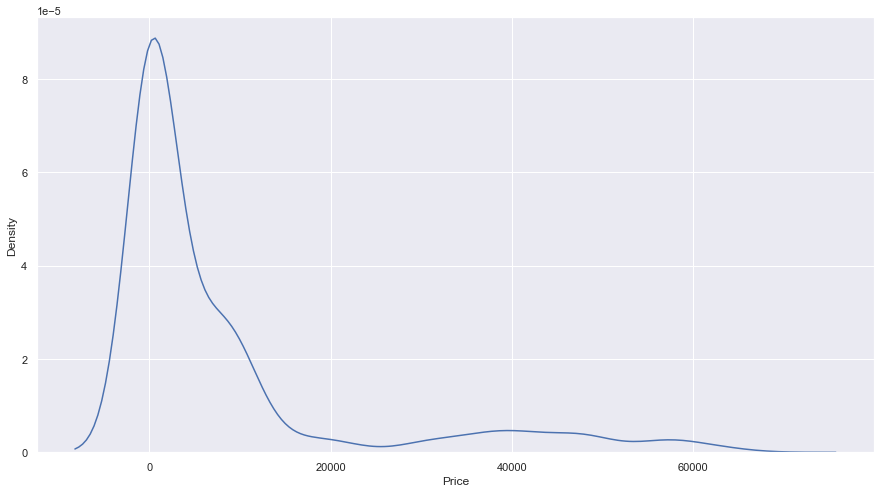

In [128]:
sns.distplot(BTC_raw_8.Price, hist=False)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

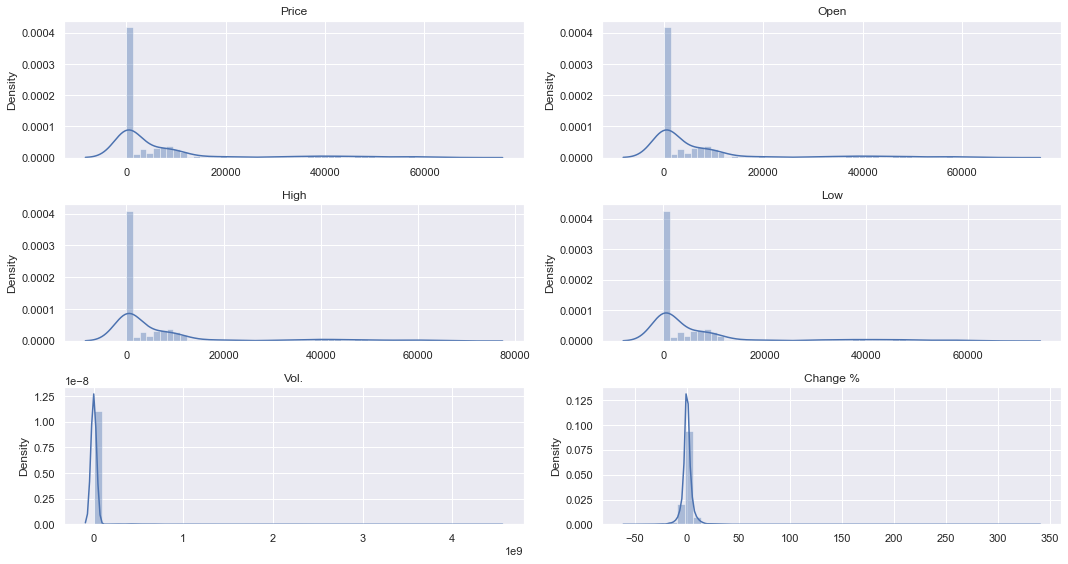

In [121]:
variables = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

columns = 2

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot (BTC_raw_8 [variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

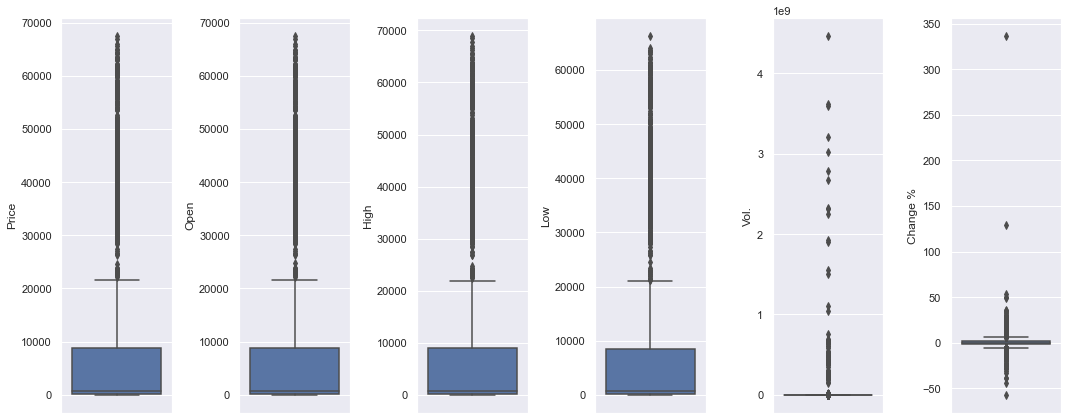

In [129]:
variables = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=BTC_raw_8, ax=ax)
plt.tight_layout()

In [130]:
correlation = BTC_raw_8.corr(method="pearson")
correlation.head(20)

Price      Open      High       Low      Vol.  Change %
Price     1.000000  0.998996  0.999557  0.999469  0.183603 -0.015548
Open      0.998996  1.000000  0.999589  0.999220  0.184134 -0.028400
High      0.999557  0.999589  1.000000  0.999157  0.183946 -0.021702
Low       0.999469  0.999220  0.999157  1.000000  0.184853 -0.020524
Vol.      0.183603  0.184134  0.183946  0.184853  1.000000 -0.006454
Change % -0.015548 -0.028400 -0.021702 -0.020524 -0.006454  1.000000

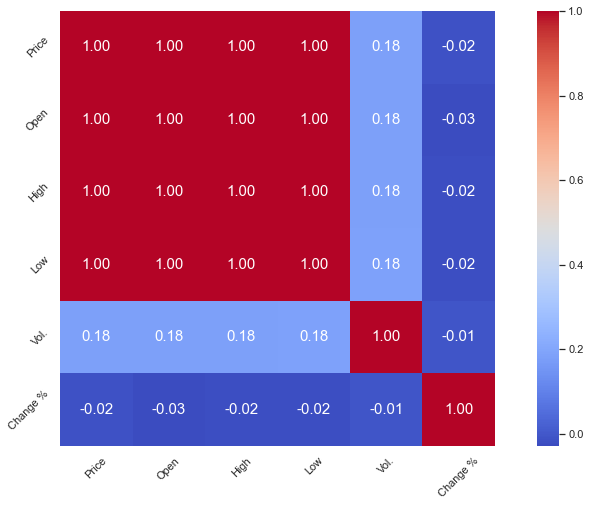

In [135]:
plt.figure(figsize=(15,8))

sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm') 

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [152]:
from pandas_profiling import ProfileReport

In [153]:
ProfileReport(BTC_raw_8, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Generando la base de datos pura

### Modificación del nombre la columna [Change %]

In [158]:
BTC = BTC_raw_8.rename(columns={'Change %':'Porcentage_diff'})

In [160]:
BTC.tail()

Date    Price     Open     High      Low      Vol.  Porcentage_diff
4381 2022-07-16  21209.9  20825.2  21561.3  20484.4  136890.0             1.85
4382 2022-07-17  20785.6  21209.8  21654.4  20755.2  132810.0            -2.00
4383 2022-07-18  22525.8  20785.6  22714.9  20770.6  279720.0             8.37
4384 2022-07-19  23410.2  22529.3  23757.3  21581.8  308910.0             3.93
4385 2022-07-20  23149.1  23412.0  23429.9  22965.9  290210.0            -1.12

### Generando la columna [Target] y otorgándole valor (0 => Porcetage_diff <= 0; 1=> Porcentage_diff > 0) 

In [162]:
BTC ["Target"] = BTC ["Porcentage_diff"]

In [163]:
BTC.tail()

Date    Price     Open     High      Low      Vol.  \
4381 2022-07-16  21209.9  20825.2  21561.3  20484.4  136890.0   
4382 2022-07-17  20785.6  21209.8  21654.4  20755.2  132810.0   
4383 2022-07-18  22525.8  20785.6  22714.9  20770.6  279720.0   
4384 2022-07-19  23410.2  22529.3  23757.3  21581.8  308910.0   
4385 2022-07-20  23149.1  23412.0  23429.9  22965.9  290210.0   

      Porcentage_diff  Target  
4381             1.85    1.85  
4382            -2.00   -2.00  
4383             8.37    8.37  
4384             3.93    3.93  
4385            -1.12   -1.12

In [164]:
BTC.loc[BTC.Porcentage_diff>0, "Target"]=1
BTC.loc[BTC.Porcentage_diff<=0, "Target"]=0

In [165]:
BTC.tail()

Date    Price     Open     High      Low      Vol.  \
4381 2022-07-16  21209.9  20825.2  21561.3  20484.4  136890.0   
4382 2022-07-17  20785.6  21209.8  21654.4  20755.2  132810.0   
4383 2022-07-18  22525.8  20785.6  22714.9  20770.6  279720.0   
4384 2022-07-19  23410.2  22529.3  23757.3  21581.8  308910.0   
4385 2022-07-20  23149.1  23412.0  23429.9  22965.9  290210.0   

      Porcentage_diff  Target  
4381             1.85     1.0  
4382            -2.00     0.0  
4383             8.37     1.0  
4384             3.93     1.0  
4385            -1.12     0.0

### Exportando la base de datos

In [166]:
BTC.to_csv ("D:\Luciano\Programación\Data science\Clase 15 (16-07-2022)\Desafío (base de datos)\BTC_final.csv", index=False, sep=";")